# How to turn a Raspberry Pi into a NAS for security footage

Ever since our flat had a number of packages get stolen from our front porch last year, I've set-up numerous security cameras (Xiaomi Mi Home Security Camera 360o 1080P) around the property to continuously record and identify when people/animals enter the frame. While this function is useful, I've found the native computer vision algorithm for recognition isn't that great. Therefore, a separate project entails the process of developing a security camera unit where footage is passed to a Raspberry Pi 4 Model B with a neural compute stick (Movidius 2) for enhanced image recognition via tiny-YOLO.

This project involves turning a Raspberry Pi 4 into a Network Associated Storage (NAS) device, where security footage is automatically passed to. This ensures data is reliably stored and easily accessible to anyone on the local network. In addition, this NAS serves as a backup should any security camera fail, as they typically write to an onboard MicroSD card.



# Step 1: Gather all required components

We'll need several components to complete this project, some of which you may already have lying around:
- [Raspberry Pi 4](https://www.raspberrypi.org/products/raspberry-pi-4-model-b/)
- [A power supply](https://www.raspberrypi.org/products/type-c-power-supply/)
- [microSD card](https://www.pbtech.co.nz/product/MEMSAM11022/Samsung-EVO-PLUS-64GB-Micro-SD-with-Adapter---up-t)
- [External HDD](https://www.pbtech.co.nz/product/HDDWDX2721/WD-Elements-SE-Portable-2TB-25-USB-30-External-HDD)
- [HMDI - microHDMI cable](https://www.raspberrypi.org/products/micro-hdmi-to-standard-hdmi-a-cable/)
- Any keyboard, mouse and HMDI compatible computer monitor


# Step 2: Install Raspberry Pi operating system

Flash a microSD card with a Raspberry Pi operating system using the [Raspberry Pi Imager](https://www.raspberrypi.org/software/). I used the default raspbian OS as shown below. Be careful about which microSD card you use as this flashing process will wipe the drive. It may take a while for it to fully install the OS. Once this is done, eject the microSD card and insert into the Raspberry Pi.


For more in-depth notes on installing the OS, follow this [guide](https://www.pcmag.com/how-to/beginners-guide-how-to-get-started-with-raspberry-pi).

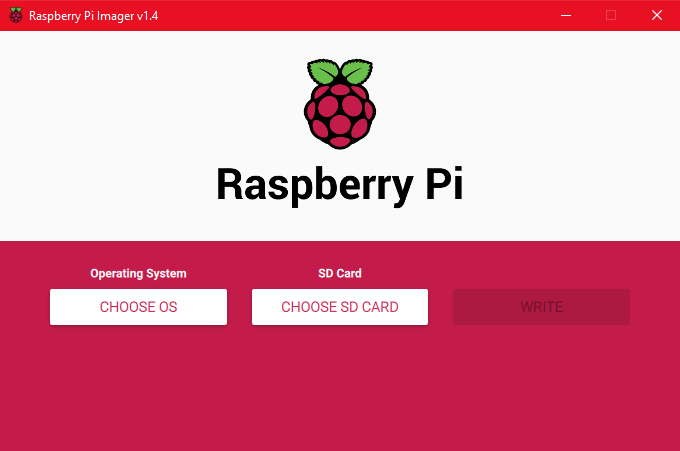

In [4]:
from IPython import display

display.Image("./Images/RaspberryPiImager.png")

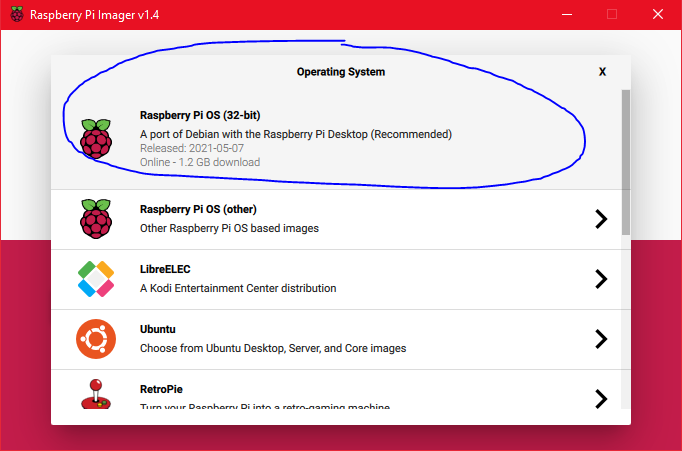

In [11]:
display.Image("./Images/RaspberryPiImager2.png")

# Step 3: Access and update your system

Connect the keyboard, mouse, computer monitor (via microHDMI - HDMI cable) and power supply to the Raspberry Pi. The set-up process should occur automatically, however once you get to the home screen you'll be asked to confirm several things (language, WiFi etc). Following this, you'll see the default home screen as shown below.


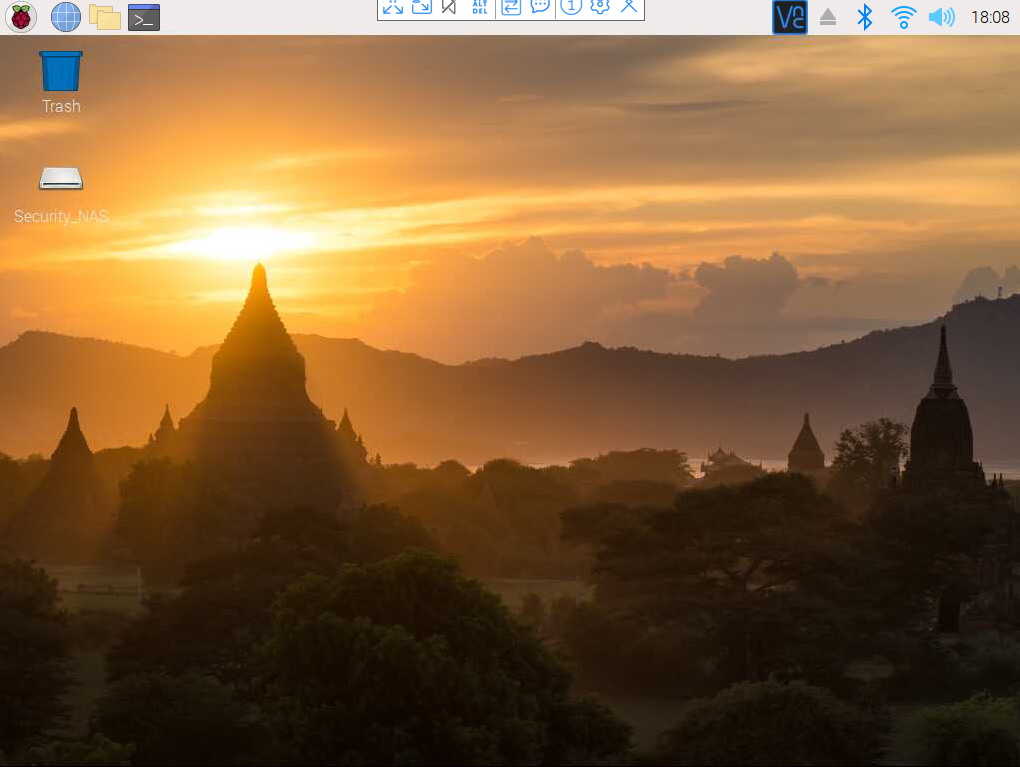

In [12]:
display.Image("./Images/RaspberryHomeScreen.png")

### Update your system
Open command line and run the following two lines to update the package list and all packages.

sudo apt-get update

sudo apt-get upgrade

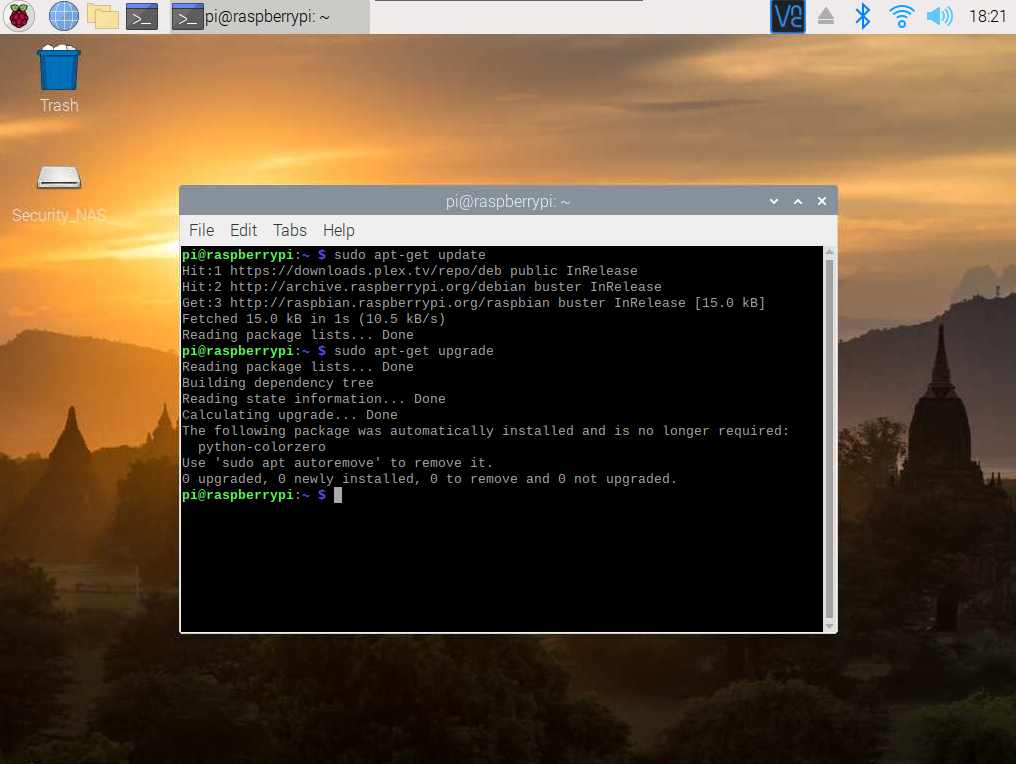

In [13]:
display.Image("./Images/RaspberryPi_Update.png")

# Step 4: Install Samba on your Raspberry Pi

After your Raspbian OS is up to date, we'll need to install the Samba software on the Raspberry Pi. Use the following command:

sudo apt-get install samba samba-common-bin

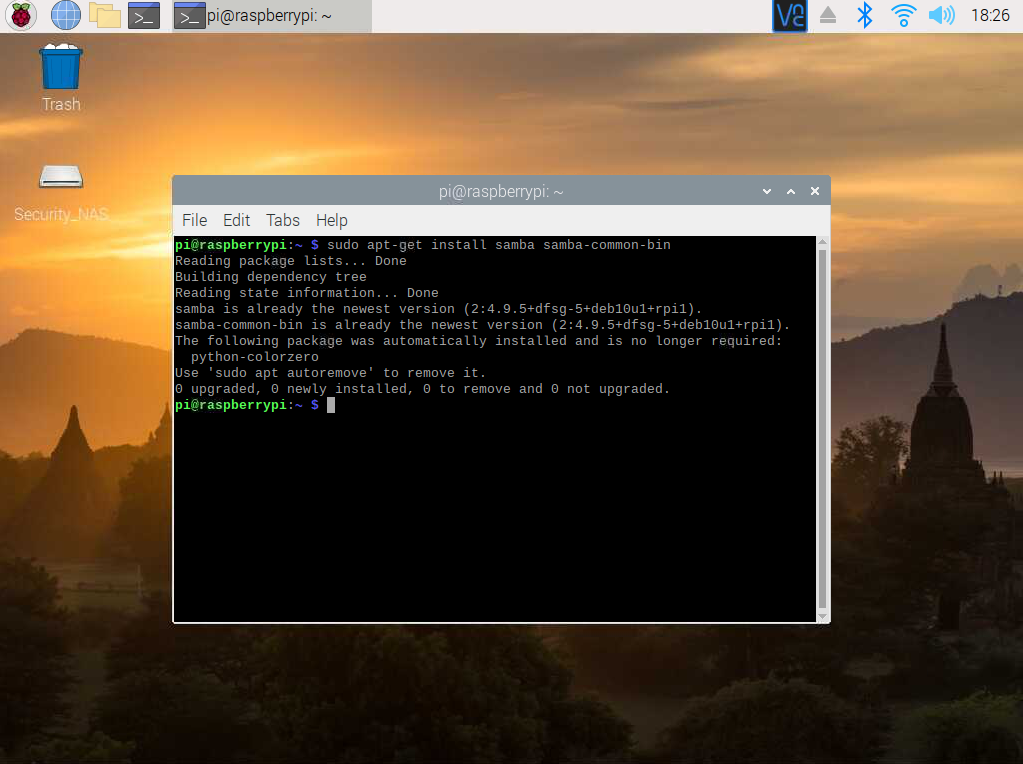

In [14]:
display.Image("./Images/RaspberryPi_Samba.png")

# Step 5: Create a Shared Folder

Now we'll need to create a place where you can store and share all our data. This folder can be located anywhere, even on a mounted external hard drive. For this tutorial we'll be creating a public and private folder accessible on the NAS. Use the following command:

mkdir /home/pi/shared


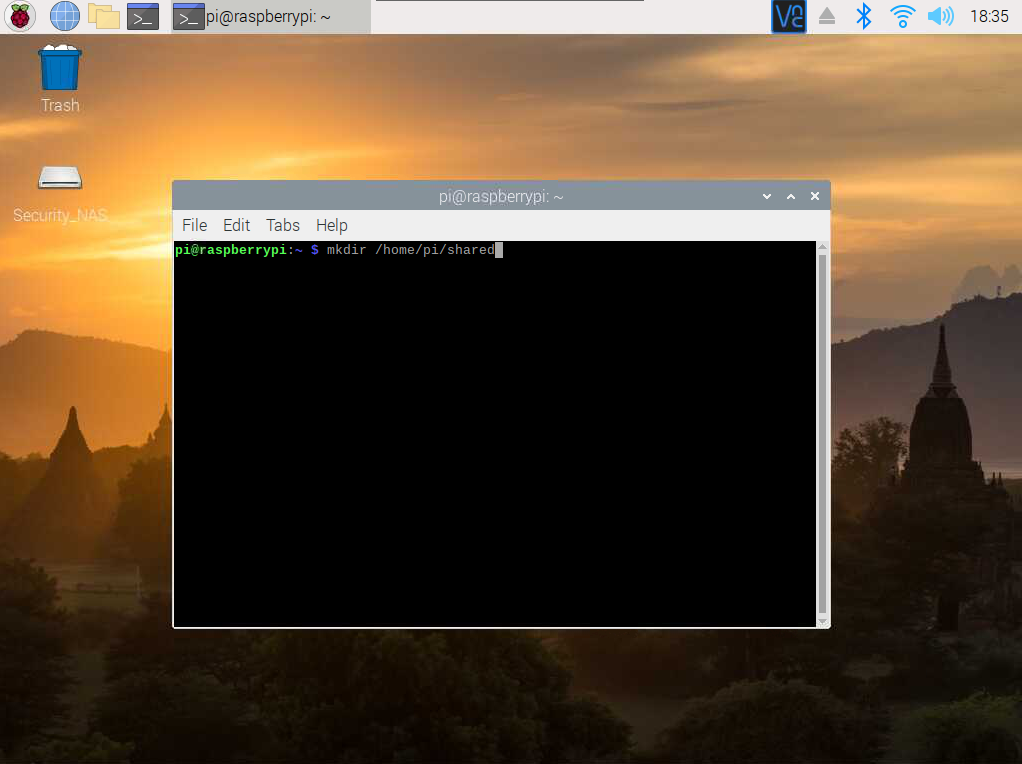

In [15]:
display.Image("./Images/RaspberryPi_SharedFolder.png")

# Step 6: Sharing folder using Samba

Now we'll be sharing the above folder we created using Samba. TO do this we'll need to modify the Samba configuration file. Use the following command to access the file:

sudo nano /etc/samba/smb.conf

The screen below should pop-up once this command has been entered. Within this file add the following to the bottom:

[Raspi-NAS]  
path = /home/pi/shared  
writeable=Yes  
create mask=0777  
directory mask=0777  
public=no

**[Sharedfolder]**: This defines the address and other configurations of the shared folder. For example, the shared folder will be created at the following address: \\raspberrypi\Sharedfolder. You can rename it to whatever you like as well.

**path**: This option contains the address of the directory that is going to be shared. If you wish to store the shared folder on an external drive, just change to path option here to point it towards your external drive.

**writeable**: If this option is set to yes, the folder will be writable.

**create mask & directory mask**: This option defines the permissions for the folder and the files it contains. By setting it to 0777, it will allow users to read, write and execute.

**public**: This option is used to give permission to either give any user access to the folder or restricted access. With the option set to “no”, the Raspberry Pi needs a valid user to grant access to shared folders.


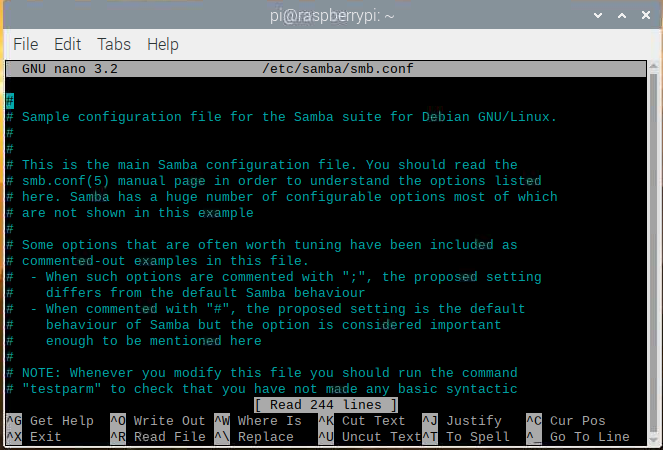

In [16]:
display.Image("./Images/RaspberryPi_Samba2.png")

### Save the changes
Now we've added the changes, we can save them by pressing **CTRL + X** then **Y** and **hit ENTER**

# Step 7: Make a User for Samba on the Raspberry Pi

Next, we will make a user for our Samba server on the Raspberry Pi in order for us to make a connection to the shared network drive. We will run a command to create a Samba user called “Pi”:

sudo smbpasswd -a pi

After running this command, you will be prompted to set a password that is up to you.  
With this user “Pi” you can access and manage the Samba folder from Windows, macOS, or other Raspberry Pi devices
If you wish to create additional users, key in the following commands:

sudo adduser username
sudo smbpasswd -a username

Replace “username” with your choice of username.

# Step 8: Connect to Samba server on Windows

### Go to Map Network Drive

To access files and folders on Windows system, we have to put the address of the shared media. You can do this by going My Computer and click Map Network Drive as shown below:

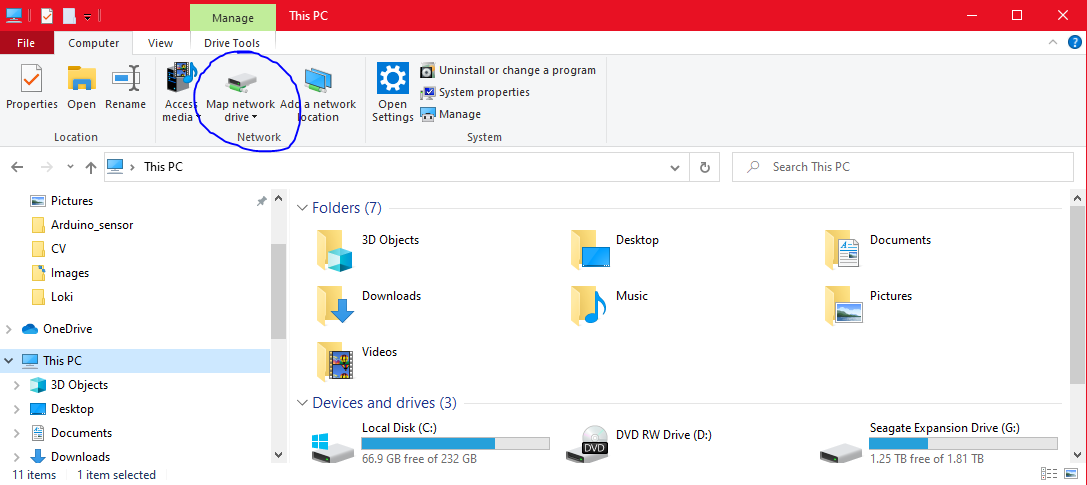

In [6]:
display.Image("./Images/SambaServer_Windows.png")

### Connect to the Network Folder

After clicking on Map network drive, this dialog will be shown.  
You will have to fill in the address which you previously defined in step 6. For this tutorial we've chosen Raspi-NAS
If the connection fails, switch out “raspberrypi” with your Raspberry Pi local IP address by entering this command in terminal (hostname -I)  
Once you are done, click Finish to finalize the connection.

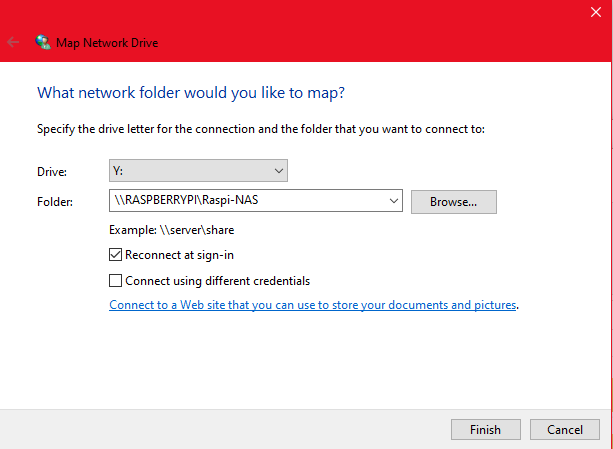

In [7]:
display.Image("./Images/SambaServer_Windows2.png")